In [1]:
#bibliotecas numpy e pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#biblioteca com os dados da planilha
sheets = pd.read_excel('dados.xlsx', sheet_name=['orcado','realizado'])

In [3]:
#DataFrame que recebe os dados da planilha na aba orcado
orcado = sheets['orcado']

In [4]:
#Dataframe que recebe os dados da planilha da aba realizado e faz um transpose para manter a formatação do Dataframe orcado
realizado = sheets['realizado'].T

In [5]:
realizado #necessário redefinir o index

,nan,Realizado
Mes_1,janeiro,240
Mes_2,fevereiro,280
Mes_3,março,200
Mes_4,abril,310
Mes_5,maio,230
Mes_6,junho,213
Mes_7,julho,239
Mes_8,agosto,210
Mes_9,setembro,210
Mes_10,outubro,210


In [6]:
#realiza o reset do index e salva a alteraçao
realizado.reset_index(inplace=True)

In [7]:
realizado

,index,nan,Realizado
0,Mes_1,janeiro,240
1,Mes_2,fevereiro,280
2,Mes_3,março,200
3,Mes_4,abril,310
4,Mes_5,maio,230
5,Mes_6,junho,213
6,Mes_7,julho,239
7,Mes_8,agosto,210
8,Mes_9,setembro,210
9,Mes_10,outubro,210


In [8]:
#deleta a coluna index e salva a alteração
realizado.drop('index',axis=1, inplace=True)

In [9]:
realizado

,nan,Realizado
0,janeiro,240
1,fevereiro,280
2,março,200
3,abril,310
4,maio,230
5,junho,213
6,julho,239
7,agosto,210
8,setembro,210
9,outubro,210


In [10]:
#insere o nome da coluna que está vazia 'nan' e salva a alteração
realizado.rename(columns={np.nan:'mês'}, inplace=True)

In [11]:
realizado

,mês,Realizado
0,janeiro,240
1,fevereiro,280
2,março,200
3,abril,310
4,maio,230
5,junho,213
6,julho,239
7,agosto,210
8,setembro,210
9,outubro,210


In [12]:
#DataFrame 'dados_saida' com o merge dos dois Dataframes já tratados 'orcado' e 'realizado'
dados_saida = pd.merge(orcado, realizado)

In [13]:
dados_saida

,mês,orcado,Realizado
0,janeiro,330,240
1,fevereiro,290,280
2,março,230,200
3,abril,321,310
4,maio,283,230
5,junho,291,213
6,julho,193,239
7,agosto,259,210
8,setembro,289,210
9,outubro,230,210


In [14]:
#insere uma nova coluna com a diferença entre o 'orcado' e 'realizado'
dados_saida.insert(3, column=3, value=orcado['orcado'] - realizado['Realizado'])

In [15]:
dados_saida

,mês,orcado,Realizado,3
0,janeiro,330,240,90
1,fevereiro,290,280,10
2,março,230,200,30
3,abril,321,310,11
4,maio,283,230,53
5,junho,291,213,78
6,julho,193,239,-46
7,agosto,259,210,49
8,setembro,289,210,79
9,outubro,230,210,20


In [16]:
#altera o nome da coluna 3 para 'diff' e salvando as alterações
dados_saida.rename(columns={3:'diff'}, inplace=True)

In [17]:
dados_saida

,mês,orcado,Realizado,diff
0,janeiro,330,240,90
1,fevereiro,290,280,10
2,março,230,200,30
3,abril,321,310,11
4,maio,283,230,53
5,junho,291,213,78
6,julho,193,239,-46
7,agosto,259,210,49
8,setembro,289,210,79
9,outubro,230,210,20


In [18]:
#Exporta 'dados_saida' para extensão '.csv'
dados_saida.to_csv('dados_saida.csv',sep=';',index=False)

 Matplotlib 

In [19]:
 # cria um vetor com 12 posições
numero_meses = np.arange(12)
# define a largura do widht
width = 0.8       

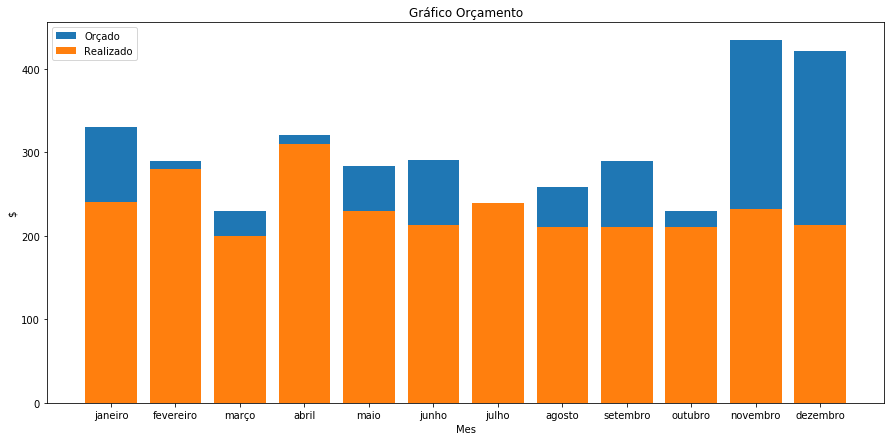

In [26]:
#define o tamanho da  caixa largura x altura
p1, p2 = plt.subplots(figsize=(15,7))

#cria as barras com orcado e realizado e define a largura
p1 = plt.bar(numero_meses, orcado['orcado'], width)
p2 = plt.bar(numero_meses, realizado['Realizado'], width)

# titulo, legendas x e y, meses, range do eixo y, e legendas à esquerda
plt.title('Gráfico Orçamento')
plt.ylabel('$')
plt.xlabel('Mes')
plt.xticks(numero_meses, orcado['mês'])
plt.yticks(np.arange(0, 500, 100))
plt.legend((p1[0], p2[0]), {'Orçado', 'Realizado'}, loc='upper left')
plt.savefig('figura.png')
plt.show()
#exporta a figura
